#*Machine Learning para Predições em Saúde*

## Análise Descritiva de Dados

#### Gabriel Ferreira dos Santos Silva

##### Conjunto de Dados Escolhido: Impacts of COVID-19 on Canadians - Mental Health

##### Objetivo da Análise: predição de ansiedade severa
##### O Conjunto de dados possui 45.989 observações, com as as seguintes variáveis listadas:
* PUMFID 01-05 Public use microdata file identifier 
* VERDATE 06-15 Version date of when the file was created 
* MH_05 16-16 Perceived mental health 
* MH_10 17-17 Mental health compared to before physical distancing 
* MH_15A 18-18 Feeling nervous, anxious or on edge - Freq last 2 weeks 
* MH_15B 19-19 Not being able to stop or control worrying - Freq last 2 weeks 
* MH_15C 20-20 Worrying too much about different things - Freq last 2 weeks 
* MH_15D 21-21 Trouble relaxing - Freq last 2 weeks 
* MH_15E 22-22 Being so restless that it is hard to sit still - Freq last 2 weeks 
* MH_15F 23-23 Becoming easily annoyed or irritable - Freq last 2 weeks 
* MH_15G 24-24 Feeling afraid as if something awful might happen - Freq last 2 weeks 
* MH_20 25-25 Perceived life stress 
* BH_60A 26-26 Freq in last week - Went shopping at the grocery store or drugstore 
* BH_60B 27-27 Freq in last week - Used delivery service for groceries or drugstore 
* BH_60C 28-28 Freq in last week - Used a food delivery service for prepared food 
* BH_55A 29-29 Concern about impact of COVID-19 - My own health 
* BH_55B 30-30 Concern about impact of COVID-19 - Member of household’s health 
* BH_55C 31-31 Concern about impact of COVID-19 - Vulnerable people’s health 
* BH_55D 32-32 Concern about impact of COVID-19 - Canadian population’s health 
* BH_55E 33-33 Concern about impact of COVID-19 - World population’s health 
* BH_55F 34-34 Concern about impact of COVID-19 - Overloading the health system 
* BH_55G 35-35 Concern about impact of COVID-19 - Civil disorder 
* BH_55H 36-36 Concern about impact of COVID-19 - Maintaining social ties 
* BH_55I 37-37 Concern about impact of COVID-19 - Able coop/supp during crisis 
* BH_55J 38-38 Concern about impact of COVID-19 - Able coop/supp after crisis 
* BH_55K 39-39 Concern about impact of COVID-19 - Family stress from confinem 
* DEM_10 40-40 Gender benchmarked to sex 
* MHDVMHI 41-41 Perceived mental health 
* ANXDVGAD 42-43 Generalized Anxiety Severity Score 
* ANXDVGAC 44-44 Generalized Anxiety Disorder Cut-point 
* ANXDVSEV 45-45 Severity of Generalized Anxiety 
* AGEGR_10 46-47 Age group in increments of 10 
* PBH_55L 48-48 Concern about impact of COVID-19 - Violence in the home 
* PCSIZMIZ 49-50 Community Size and Metropolitan Influence Zones 
* PIIDFLAG 51-51 Indigenous identity flag 
* PIMMST 52-52 Immigration status 
* PLM_30 53-54 Scale - I might lose main job or main self-empl income next 4 weeks 
* PLM_40 55-55 COVID-19 impacts ability meet financial obligations or essential needs 
* PPROV 56-57 Province of residence 
* PRURURB 58-58 Rural/Urban indicator 
* PVISMIN 59-59 Visible minority flag 
* PAGEGR 60-61 Age group 
* PUMFFACT 62-73 Factor to benchmark survey to population totals, stand to num particip 

##### A variável desfecho considerada foi ANXDVGAC 44-44 Generalized Anxiety Disorder Cut-point 

## Roteiro de Análise
1. Importação dos Pacotes
2. Chamada do Conjunto de Dados
3. Transformação das Variáveis
4. Separação em treino e teste - Split aplicado de 80%
5. Retirada de variáveis indesejadas
6. Correlação/Teste de dependência *_(novo)_*
7. Gráficos de frequências para X_train
8. One Hot Encoding
9. Treinamento do Primeiro Modelo (Entrega 2)
10. Obtenção das métricas com base no conjunto de teste (Entrega 2)
11. Treinando e comparando múltiplos algoritmos (Entrega 3)
12. Desenvolvendo algoritmo selecionado (Entrega 3)
    * Logistic Regression
    * LightGBM
    * Adaboost
13. Feature Selection - Boruta (Entrega 3)
14. Modelo de Regressão Logística com Boruta (Entrega 3)
15. LGBM com Boruta (Entrega 3)
16. Próximos passos

## Dificuldades encontradas
1. O modelo apresentou métricas relativamente altas, despertando a atenção a possíveis vazamentos de informação. Como algumas variáveis são de conhecimento técnico, a colaboração de um profissional capacitado no tema será fundamental para o desenvolvimento do modelo.

# 1) Importação dos Pacotes

In [ ]:
!pip install lazypredict
!pip install dfply
!pip install pyforest
!pip install boruta

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import plotly.express as px
from sklearn.model_selection import train_test_split
from dfply import *
%matplotlib inline 
sns.set(color_codes=True)

# 2) Chamada do Conjunto de Dados

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1kErGPTcfCJotNKceFIDW0Q_qLgNJlGM8")
df.head().T

,0,1,2,3,4
PUMFID,5106,5107,5108,5109,5110
VERDATE,10/06/2020,10/06/2020,10/06/2020,10/06/2020,10/06/2020
MH_05,3,3,1,2,3
MH_10,3,3,3,4,4
MH_15A,3,3,1,3,3
MH_15B,4,1,1,3,2
MH_15C,2,2,1,2,2
MH_15D,2,2,1,3,2
MH_15E,2,1,1,2,3
MH_15F,2,2,1,3,3


In [ ]:
df.info() # tomando informações sobre o tipo das variáveis parametrizadas na chamada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45989 entries, 0 to 45988
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PUMFID    45989 non-null  int64  
 1   VERDATE   45989 non-null  object 
 2   MH_05     45989 non-null  int64  
 3   MH_10     45989 non-null  int64  
 4   MH_15A    45989 non-null  int64  
 5   MH_15B    45989 non-null  int64  
 6   MH_15C    45989 non-null  int64  
 7   MH_15D    45989 non-null  int64  
 8   MH_15E    45989 non-null  int64  
 9   MH_15F    45989 non-null  int64  
 10  MH_15G    45989 non-null  int64  
 11  MH_20     45989 non-null  int64  
 12  BH_60A    45989 non-null  int64  
 13  BH_60B    45989 non-null  int64  
 14  BH_60C    45989 non-null  int64  
 15  BH_55A    45989 non-null  int64  
 16  BH_55B    45989 non-null  int64  
 17  BH_55C    45989 non-null  int64  
 18  BH_55D    45989 non-null  int64  
 19  BH_55E    45989 non-null  int64  
 20  BH_55F    45989 non-null  in

# 3) Transformação das Variáveis

Neste etapa, foi realizada a transformação da variável target. A variável escolhida foi ANXDVGAC 44-44 Generalized Anxiety Disorder Cut-point, cujo resultado é proveniente da realização do teste GAD-7. O resultado é estratificado em variável binária: 1 para aqueles que atingiram o cut-point de severidade e 2 para aqueles que não atingiram. 

Das 45.989 observações, 623 não apresentaram o desfecho, representado, portanto, valores missing. Como o valor é relativamente baixo, considerando a totalidade do grupo, os 623 indivíduos foram retirados do modelo. 

Nas linhas abaixo, transformamos a variável dicotômica 1 e 2 para o formato 1 e 0, criamos o conjunto features, que representa as variáveis X e ou conjunto outcome, que representa a variável y. 

In [ ]:
# 3) Transformação das Variáveis
# 3.1) Gerando variável target
df['ANXDVGAC'] = [0 if x == 2 else 1 if x == 1 else 9 for x in df['ANXDVGAC']]
display(df['ANXDVGAC'].value_counts())

0    32167
1    13199
9      623
Name: ANXDVGAC, dtype: int64

In [ ]:
# Removendo os desfechos com NaN
df_filtrado = df[df["ANXDVGAC"] != 9]
display(df_filtrado['ANXDVGAC'].value_counts())

0    32167
1    13199
Name: ANXDVGAC, dtype: int64

In [ ]:
# Separando os conjuntos de dados entre variáveis "preditoras" e desfecho

features = df_filtrado.drop('ANXDVGAC',1)
outcome = df_filtrado.ANXDVGAC
np.random.seed(42)

# 4) Separação entre treino e teste

Nesta etapa, o conjunto de dados foi separado entre treino e teste, com a proporção de 80% e 20%, respectivamente. 

Além disso, foram expurgadas variáveis candidatas a possível vazamento de informação. Foram elas:
* PUMFID 01-05 Public use microdata file identifier 
* VERDATE 06-15 Version date of when the file was created 
* MH_15A 18-18 Feeling nervous, anxious or on edge - Freq last 2 weeks 
* ANXDVGAD 42-43 Generalized Anxiety Severity Score 
* ANXDVSEV 45-45 Severity of Generalized Anxiety 
* PUMFFACT 62-73 Factor to benchmark survey to population totals, stand to num particip 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2)

In [ ]:
# Obtendo o shape dos conjuntos de treino e teste
print(f"X_train Shape {X_train.shape}")
print(f"X_test Shape {X_test.shape}")
print(f"y_train Shape {y_train.shape}")
print(f"y_test Shape {y_test.shape}")

X_train Shape (36292, 42)
X_test Shape (9074, 42)
y_train Shape (36292,)
y_test Shape (9074,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36292 entries, 21571 to 16007
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PUMFID    36292 non-null  int64  
 1   VERDATE   36292 non-null  object 
 2   MH_05     36292 non-null  int64  
 3   MH_10     36292 non-null  int64  
 4   MH_15A    36292 non-null  int64  
 5   MH_15B    36292 non-null  int64  
 6   MH_15C    36292 non-null  int64  
 7   MH_15D    36292 non-null  int64  
 8   MH_15E    36292 non-null  int64  
 9   MH_15F    36292 non-null  int64  
 10  MH_15G    36292 non-null  int64  
 11  MH_20     36292 non-null  int64  
 12  BH_60A    36292 non-null  int64  
 13  BH_60B    36292 non-null  int64  
 14  BH_60C    36292 non-null  int64  
 15  BH_55A    36292 non-null  int64  
 16  BH_55B    36292 non-null  int64  
 17  BH_55C    36292 non-null  int64  
 18  BH_55D    36292 non-null  int64  
 19  BH_55E    36292 non-null  int64  
 20  BH_55F    36292 non-null

In [ ]:
# Verificando quantas categorias por variável existem       
cat_stats = pd.DataFrame(columns = ['Coluna', 'Valores', 'Contagem de Categorias'])
tmp = pd.DataFrame()

for c in X_train.columns:
    tmp['Coluna'] = [c]
    tmp['Valores'] = [X_train[c].unique()]
    tmp['Contagem de Categorias'] = f"A variável {c} possui {len(list(X_train[c].unique()))} categorias únicas"

    cat_stats = cat_stats.append(tmp)
    
cat_stats


,Coluna,Valores,Contagem de Categorias
0,PUMFID,"[26677, 38141, 19469, 9503, 10169, 43456, 1209...",A variável PUMFID possui 36292 categorias únicas
0,VERDATE,[10/06/2020],A variável VERDATE possui 1 categorias únicas
0,MH_05,"[2, 4, 3, 5, 1, 9]",A variável MH_05 possui 6 categorias únicas
0,MH_10,"[2, 4, 3, 5, 9, 1]",A variável MH_10 possui 6 categorias únicas
0,MH_15A,"[1, 4, 2, 3]",A variável MH_15A possui 4 categorias únicas
0,MH_15B,"[1, 4, 3, 2]",A variável MH_15B possui 4 categorias únicas
0,MH_15C,"[1, 4, 3, 2]",A variável MH_15C possui 4 categorias únicas
0,MH_15D,"[1, 4, 3, 2]",A variável MH_15D possui 4 categorias únicas
0,MH_15E,"[1, 3, 2, 4]",A variável MH_15E possui 4 categorias únicas
0,MH_15F,"[1, 4, 3, 2]",A variável MH_15F possui 4 categorias únicas


# 5) Retirada de Variáveis com possível vazamento de informação

Além disso, foram expurgadas variáveis candidatas a possível vazamento de informação. São elas:

* PUMFID 01-05 Public use microdata file identifier
* VERDATE 06-15 Version date of when the file was created
* MH_15A 18-18 Feeling nervous, anxious or on edge - Freq last 2 weeks
* ANXDVGAD 42-43 Generalized Anxiety Severity Score
* ANXDVSEV 45-45 Severity of Generalized Anxiety
* PUMFFACT 62-73 Factor to benchmark survey to population totals, stand to num particip

In [ ]:
# Retirar Variáveis com possível vazamento de informação
to_drop_list = ['PUMFID', 'VERDATE', 'MH_15A','ANXDVGAD','ANXDVSEV', 'PUMFFACT']
X_train = X_train.drop(columns= to_drop_list)
X_test = X_test.drop(columns= to_drop_list)

In [ ]:
X_train.describe()

,MH_05,MH_10,MH_15B,MH_15C,MH_15D,MH_15E,MH_15F,MH_15G,MH_20,BH_60A,BH_60B,BH_60C,BH_55A,BH_55B,BH_55C,BH_55D,BH_55E,BH_55F,BH_55G,BH_55H,BH_55I,BH_55J,BH_55K,DEM_10,MHDVMHI,AGEGR_10,PBH_55L,PCSIZMIZ,PIIDFLAG,PIMMST,PLM_30,PLM_40,PPROV,PRURURB,PVISMIN,PAGEGR
count,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000,36292.000000
mean,2.816103,3.568968,1.889039,2.049708,2.138240,1.744902,2.214703,1.869806,3.087402,3.257770,3.780365,3.598451,2.165215,2.448115,3.083159,2.571255,2.596688,2.788769,2.113965,2.215419,2.231732,2.215282,2.163424,1.751102,2.188554,3.503003,1.081588,2.576601,1.984597,1.139314,4.737160,3.298440,36.647691,1.976000,1.986498,5.472501
std,1.056043,0.844277,0.965158,0.973744,1.007364,0.930418,0.983020,0.965924,0.951364,0.528996,0.563713,0.619755,0.827481,1.064161,0.863201,0.757113,0.825654,0.864695,0.926238,0.943849,0.908342,0.939330,1.000010,0.432380,1.057425,1.392642,0.502273,1.495154,0.363923,0.467618,4.782238,1.144304,13.411572,0.882913,0.801809,2.667236
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,4.000000,3.000000,35.000000,2.000000,2.000000,3.000000
50%,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,5.000000,4.000000,35.000000,2.000000,2.000000,5.000000
75%,4.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,5.000000,1.000000,3.000000,2.000000,1.000000,6.000000,4.000000,47.000000,2.000000,2.000000,8.000000
max,9.000000,9.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,9.000000,6.000000,9.000000,9.000000,9.000000,9.000000,99.000000,9.000000,63.000000,9.000000,9.000000,10.000000


# 6)  Correlação/Teste de dependência

* Objetivo: como estmaos diante de variáveis categóricas, o objetivo é gerar uma matrix de dependência entre as variáveis, com resultado do p-valor relativo ao seguinte teste de hipóteses:
    * H0: variáveis são dependentes
    * H1: Variáveis são independentes.
    
Retirado de: https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
resultant = pd.DataFrame(data=[(0 for i in range(len(X_train.columns))) for i in range(len(X_train.columns))], 
                         columns=list(X_train.columns))
resultant.set_index(pd.Index(list(X_train.columns)), inplace = True)

# Encontrando os p-valores para as variáveis e formatando em matriz de p-valor

for i in list(X_train.columns):
    for j in list(X_train.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

                  MH_05          MH_10  ...        PVISMIN         PAGEGR
MH_05      0.000000e+00   0.000000e+00  ...   1.033553e-01  7.772129e-217
MH_10     1.785972e-290   0.000000e+00  ...   3.189013e-04   1.046033e-35
MH_15B     0.000000e+00   0.000000e+00  ...   1.023397e-02  1.513153e-104
MH_15C     0.000000e+00   0.000000e+00  ...   9.300869e-06  2.002208e-143
MH_15D     0.000000e+00   0.000000e+00  ...   4.041331e-01  1.977177e-160
MH_15E     0.000000e+00   0.000000e+00  ...   6.363094e-03   1.875525e-88
MH_15F     0.000000e+00   0.000000e+00  ...   6.206860e-01  2.576263e-248
MH_15G     0.000000e+00   0.000000e+00  ...   4.098950e-04   3.392451e-61
MH_20      0.000000e+00   0.000000e+00  ...   7.231232e-01  3.814454e-153
BH_60A     2.182188e-01   4.792892e-01  ...   7.379273e-01   8.834370e-04
BH_60B     9.190624e-01   7.702632e-01  ...   9.547041e-01   1.147364e-01
BH_60C     1.075317e-06   5.942042e-06  ...   2.242018e-01   2.475007e-47
BH_55A    2.085930e-105   2.950955e-80

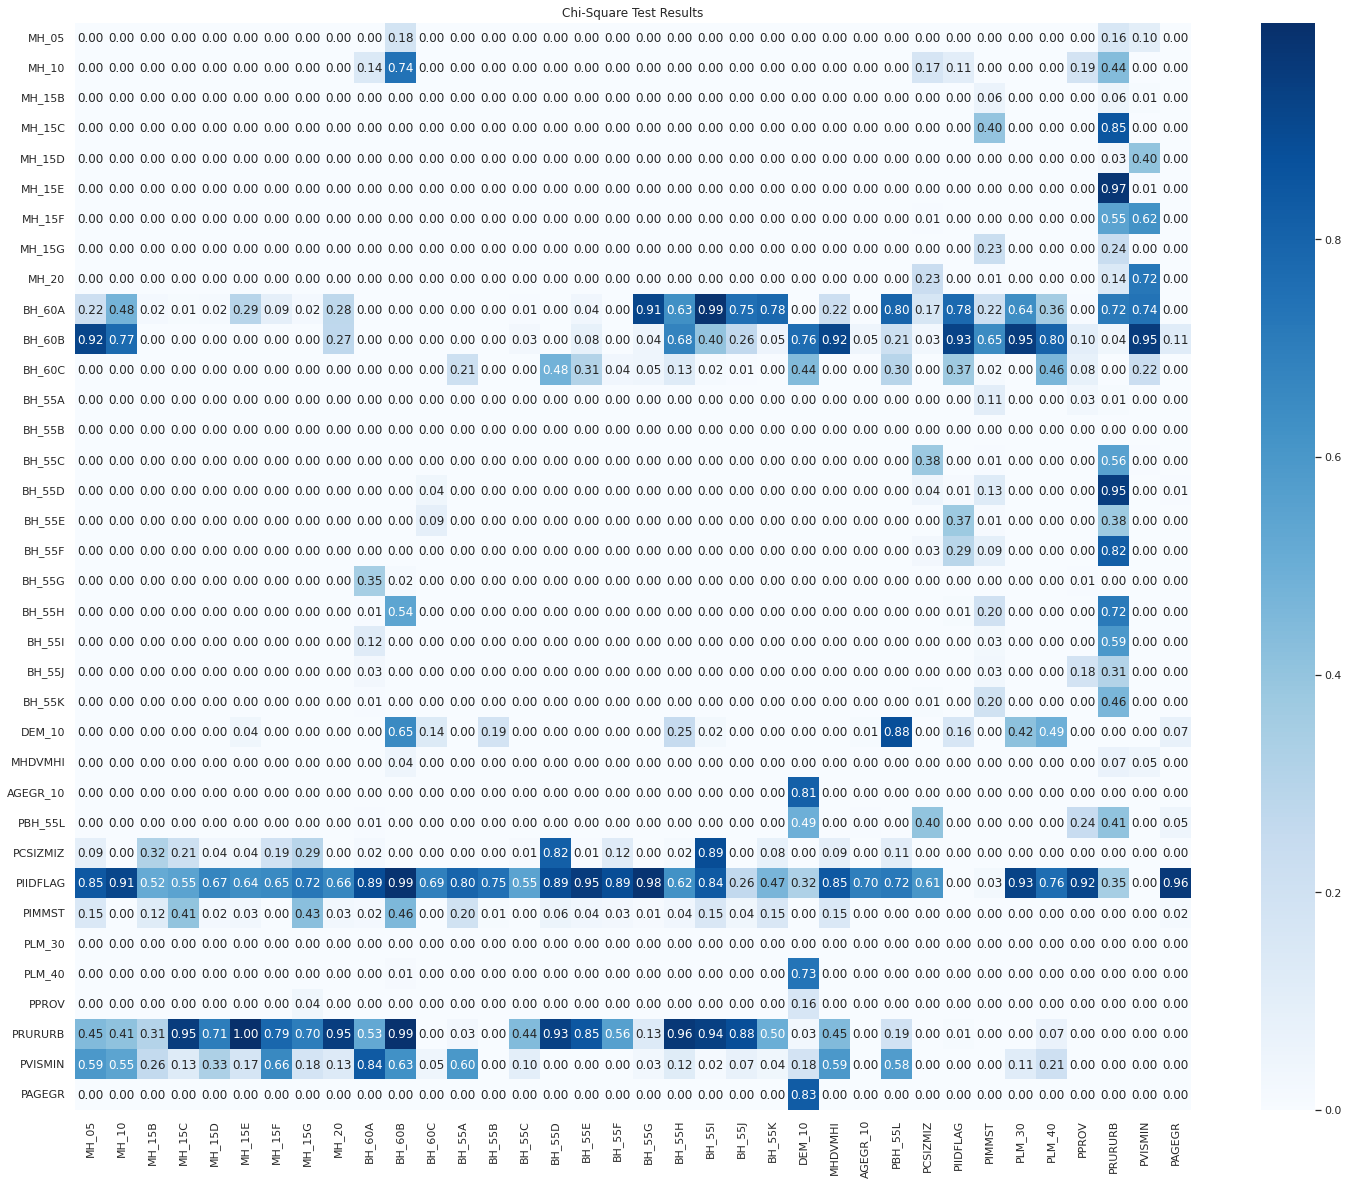

In [ ]:
# Plotando o heatmap
fig = plt.figure(figsize=(25,20))
sns.heatmap(resultant, annot=True, cmap='Blues',fmt='.2f')
plt.title('Chi-Square Test Results')
plt.show()

# 7) Gráficos de Frequência em relação ao X_train

In [ ]:
X_train.columns

Index(['MH_05', 'MH_10', 'MH_15B', 'MH_15C', 'MH_15D', 'MH_15E', 'MH_15F',
       'MH_15G', 'MH_20', 'BH_60A', 'BH_60B', 'BH_60C', 'BH_55A', 'BH_55B',
       'BH_55C', 'BH_55D', 'BH_55E', 'BH_55F', 'BH_55G', 'BH_55H', 'BH_55I',
       'BH_55J', 'BH_55K', 'DEM_10', 'MHDVMHI', 'AGEGR_10', 'PBH_55L',
       'PCSIZMIZ', 'PIIDFLAG', 'PIMMST', 'PLM_30', 'PLM_40', 'PPROV',
       'PRURURB', 'PVISMIN', 'PAGEGR'],
      dtype='object')

In [ ]:
feature = ['MH_05', 'MH_10', 'MH_15B', 'MH_15C', 'MH_15D', 'MH_15E', 'MH_15F',
       'MH_15G', 'MH_20', 'BH_60A', 'BH_60B', 'BH_60C', 'BH_55A', 'BH_55B',
       'BH_55C', 'BH_55D', 'BH_55E', 'BH_55F', 'BH_55G', 'BH_55H', 'BH_55I',
       'BH_55J', 'BH_55K', 'DEM_10', 'MHDVMHI', 'AGEGR_10', 'PBH_55L',
       'PCSIZMIZ', 'PIIDFLAG', 'PIMMST', 'PLM_30', 'PLM_40', 'PPROV',
       'PRURURB', 'PVISMIN', 'PAGEGR']

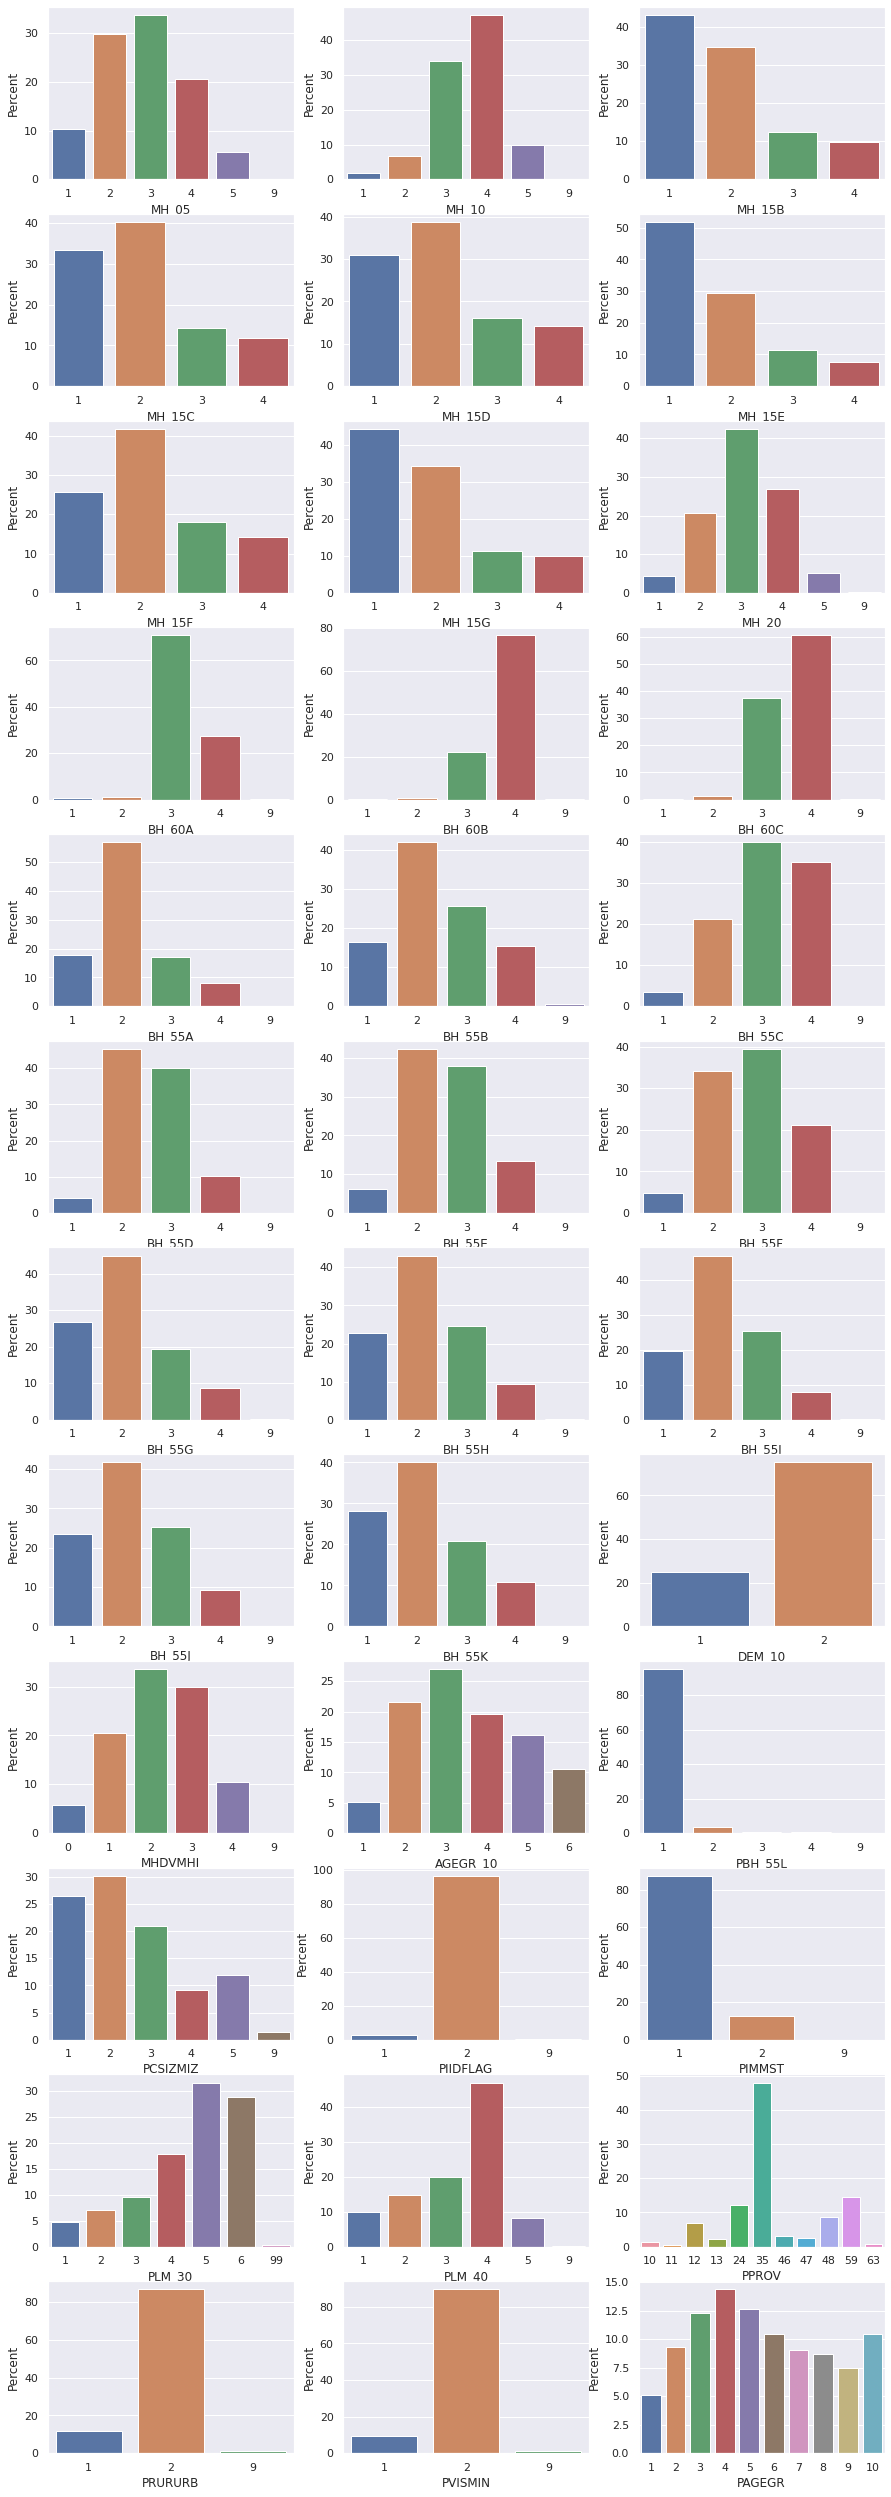

In [ ]:
plt.figure(figsize = (15,45))
for i in enumerate(feature):
    plt.subplot(12,3,i[0]+1)
    grafico = sns.barplot(x=i[1],y=i[1],
                data=X_train, estimator=lambda x: len(x) / len(X_train) * 100)
    grafico.set(ylabel="Percent")

# 8) Obtendo dummies (One Hot Encoding)

Os valores missing estão sendo tratados, nesse primeiro momento, como uma categoria. As variáveis apresentam o valor missing por meio do número 9 ou 99.

In [ ]:
# Criando a lista de variáveis a serem transformadas em dummies
to_dummy_list = list(X_train.columns)

In [ ]:
# Transformando as variáveis categóricas em dummys, tanto no teste, quando no treino
X_train = pd.get_dummies(X_train, columns = to_dummy_list)
X_test = pd.get_dummies(X_test, columns = to_dummy_list)

In [ ]:
X_train.head()

,MH_05_1,MH_05_2,MH_05_3,MH_05_4,MH_05_5,MH_05_9,MH_10_1,MH_10_2,MH_10_3,MH_10_4,MH_10_5,MH_10_9,MH_15B_1,MH_15B_2,MH_15B_3,MH_15B_4,MH_15C_1,MH_15C_2,MH_15C_3,MH_15C_4,MH_15D_1,MH_15D_2,MH_15D_3,MH_15D_4,MH_15E_1,MH_15E_2,MH_15E_3,MH_15E_4,MH_15F_1,MH_15F_2,MH_15F_3,MH_15F_4,MH_15G_1,MH_15G_2,MH_15G_3,MH_15G_4,MH_20_1,MH_20_2,MH_20_3,MH_20_4,...,PLM_30_1,PLM_30_2,PLM_30_3,PLM_30_4,PLM_30_5,PLM_30_6,PLM_30_99,PLM_40_1,PLM_40_2,PLM_40_3,PLM_40_4,PLM_40_5,PLM_40_9,PPROV_10,PPROV_11,PPROV_12,PPROV_13,PPROV_24,PPROV_35,PPROV_46,PPROV_47,PPROV_48,PPROV_59,PPROV_63,PRURURB_1,PRURURB_2,PRURURB_9,PVISMIN_1,PVISMIN_2,PVISMIN_9,PAGEGR_1,PAGEGR_2,PAGEGR_3,PAGEGR_4,PAGEGR_5,PAGEGR_6,PAGEGR_7,PAGEGR_8,PAGEGR_9,PAGEGR_10
21571,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
33035,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
14363,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4397,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5063,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# convertendo o desfecho para valor inteiro (em alguma das etapas anteriores, a variável foi transformada em float)
y_test = y_test.astype('int64')
y_train = y_train.astype('int64')

In [ ]:
y_train.dtypes

dtype('int64')

# 9) Treinando o primeiro algoritmo (xgboost)

O algoritmo treinado foi o xgboost, como forma de se obter o primeiro contato com o conjunto de dados. Ainda não foi realizada seleção de hiperâmetros, tampouco iterações. 

O default utilizado foi:

`params = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3,
    'eval_metric': "mlogloss"}
steps = 20'`


Foram realizados os seguintes passos: 

* Importar o algoritmo e as métricas de avaliação
* Definição dos hiperparâmetros
* Criação e treinamento do modelo
* Teste do Modelo

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
import xgboost as xgb

In [ ]:
# definição dos hiperparâmetros iniciais

params = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3,
    'eval_metric': "mlogloss"}
steps = 20

In [ ]:
# Criação dos conjuntos de treino e teste no formato do xgboost
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params, D_train, steps)

In [ ]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

# 10) Obtenção das métricas com base no conjunto de teste

Nesta primeira etapa, foram obtidas as seguintes métricas: precision, recall, accuracy e AUC(ROC)

In [ ]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("AUC (ROC) = {}".format(roc_auc_score(y_test, best_preds)))

Precision = 0.9723668265589498
Recall = 0.963371549274896
Accuracy = 0.9736610094776283
AUC (ROC) = 0.963371549274896


# 11) Testando múltiplos algoritmos

Foi utilizado o lazypredict para comparar múltiplos algoritmos. Como o conjuno de dados é relativamente grande, deixei o código em comentário, anexando a imagem do resultado na linha seguinte. 

In [ ]:
# import pyforest
# import warnings
# warnings.filterwarnings("ignore")
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# import lazypredict
# from lazypredict.Supervised import LazyClassifier;

In [ ]:
# Não roda no colab pelo limite de tempo. 
# Anexei a imagem do resultado gerado no jupyter

# clf = LazyClassifier(verbose=0,ignore_warnings=True)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

![alt text](https://drive.google.com/uc?id=1-9cWY5ARuWtpryd-PvtkRmr-Sh03PE07)

# 12) Construção dos modelos

Obs: foram selecionados os seguintes modelos:
* Regresão Logística: melhor AUC e baixo tempo de construção
* LGBM: desempenho próximo ao CalibratedClassifierCV e ao LinearSVC, porém com um tempo de rodagem bastante inferior
* Adaboost: testar segundo melhor algoritmo de boost
 

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_log = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred_log], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [ ]:
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_log)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_log)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_log)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_log)))

Accuracy: 0.9764
Precision: 0.9625
Recall: 0.9559
AUC: 0.9704


## Light GBM

In [ ]:
import lightgbm as lgb
model_lgbm = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=0,eval_metric='logloss')


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
y_pred_lgbm = pd.Series(model_lgbm.predict(X_test))

In [ ]:
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_lgbm)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_lgbm)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_lgbm)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_lgbm)))

Accuracy: 0.9747
Precision: 0.9581
Recall: 0.9544
AUC: 0.9687


## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

svc=SVC(probability=True, kernel='linear')

In [ ]:
model_ada = AdaBoostClassifier(n_estimators = 50, algorithm='SAMME', learning_rate = 1)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)

In [ ]:
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_ada)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_ada)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_ada)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_ada)))

Accuracy: 0.9734
Precision: 0.9676
Recall: 0.9400
AUC: 0.9636


# 13) Feature Selection com Boruta

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# criando estimator para o Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)

# parametrizando para o conjunto de treino
boruta.fit(np.array(X_train), np.array(y_train))

# resultados
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['MH_15B_1', 'MH_15B_2', 'MH_15B_3', 'MH_15B_4', 'MH_15C_1', 'MH_15C_2', 'MH_15C_3', 'MH_15C_4', 'MH_15D_1', 'MH_15D_2', 'MH_15D_3', 'MH_15D_4', 'MH_15E_1', 'MH_15E_2', 'MH_15E_3', 'MH_15E_4', 'MH_15F_1', 'MH_15F_2', 'MH_15F_3', 'MH_15F_4', 'MH_15G_1', 'MH_15G_2', 'MH_15G_3', 'MH_15G_4']
features in the blue area: []


# 14) Modelo de Regressão Logística com Boruta

In [ ]:
# Modelo com Boruta
X_train_boruta = X_train[['MH_15B_1', 'MH_15B_2', 'MH_15B_3', 'MH_15B_4', 'MH_15C_1', 
         'MH_15C_2', 'MH_15C_3', 'MH_15C_4', 'MH_15D_1', 'MH_15D_2', 
         'MH_15D_3', 'MH_15D_4', 'MH_15E_1', 'MH_15E_2', 'MH_15E_3', 
         'MH_15E_4', 'MH_15F_1', 'MH_15F_2', 'MH_15F_3', 'MH_15F_4', 
         'MH_15G_1', 'MH_15G_2', 'MH_15G_3', 'MH_15G_4']]
X_test_boruta = X_test[['MH_15B_1', 'MH_15B_2', 'MH_15B_3', 'MH_15B_4', 'MH_15C_1', 
         'MH_15C_2', 'MH_15C_3', 'MH_15C_4', 'MH_15D_1', 'MH_15D_2', 
         'MH_15D_3', 'MH_15D_4', 'MH_15E_1', 'MH_15E_2', 'MH_15E_3', 
         'MH_15E_4', 'MH_15F_1', 'MH_15F_2', 'MH_15F_3', 'MH_15F_4', 
         'MH_15G_1', 'MH_15G_2', 'MH_15G_3', 'MH_15G_4']]

print(X_train_boruta.shape, X_test_boruta.shape)

(36292, 24) (9074, 24)


In [ ]:
model_logistic_boruta = LogisticRegression()
model_logistic_boruta.fit(X_train_boruta, y_train)

LogisticRegression()

In [ ]:
y_pred_log_boruta = pd.Series(model_logistic_boruta.predict(X_test_boruta))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred_log_boruta], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [ ]:
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_log_boruta)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_log_boruta)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_log_boruta)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_log_boruta)))


Accuracy: 0.9759
Precision: 0.9632
Recall: 0.9533
AUC: 0.9692


In [ ]:
# Como a AUC caiu, optei por realizar novamente o comparativo entre os algoritmos, 
# utilizando as variáveis selecionadas pelo BORUTA

#clf = LazyClassifier(verbose=0,ignore_warnings=True)
#models, predictions = clf.fit(X_train_boruta, X_test_boruta, y_train, y_test)
#models

100%|██████████| 29/29 [04:05<00:00,  8.47s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.97,0.97,0.98,0.24
CalibratedClassifierCV,0.98,0.97,0.97,0.98,1.47
LinearSVC,0.98,0.97,0.97,0.98,0.54
LogisticRegression,0.98,0.97,0.97,0.98,0.21
BernoulliNB,0.97,0.97,0.97,0.97,0.07
SVC,0.98,0.97,0.97,0.98,4.36
AdaBoostClassifier,0.97,0.97,0.97,0.97,0.85
SGDClassifier,0.97,0.97,0.97,0.97,0.11
XGBClassifier,0.97,0.97,0.97,0.97,0.88


![alt text](https://drive.google.com/uc?id=1Y5ol1uvi1nymyEGqMmn3yXxqkiuVo8zS)

# 15) LGBM com Boruta

In [ ]:
import lightgbm as lgb
model_lgbm_boruta = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgbm_boruta.fit(X_train_boruta,y_train,eval_set=[(X_test_boruta,y_test),(X_train_boruta,y_train)],
          verbose=0,eval_metric='logloss')


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
y_pred_lgbm_boruta = pd.Series(model_lgbm_boruta.predict(X_test_boruta))

In [ ]:
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred_lgbm_boruta)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred_lgbm_boruta)))
print("Recall: {:.4f}".format(metrics.recall_score(y_test, y_pred_lgbm_boruta)))
print("AUC: {:.4f}".format(metrics.roc_auc_score(y_test, y_pred_lgbm_boruta)))

Accuracy: 0.9758
Precision: 0.9596
Recall: 0.9567
AUC: 0.9701


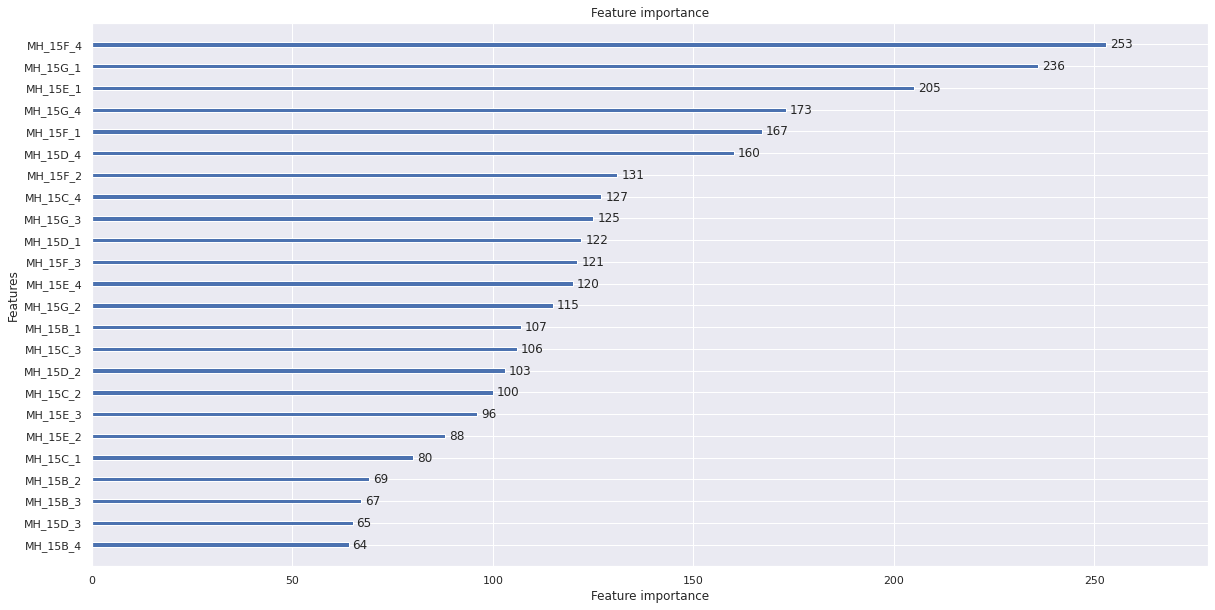

In [ ]:
# Feature Importance
lgb.plot_importance(model_lgbm_boruta)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 564 kB 13.6 MB/s 


In [ ]:
explainer = shap.TreeExplainer(model=model_lgbm_boruta)
shap_values_train = explainer.shap_values(X_train_boruta, y_train)

In [ ]:
y_pred_train_proba = model_lgbm_boruta.predict_proba(X_train_boruta)
shap_values_train[1][3]

array([ 1.03234581, -1.03236768, -0.08711347, -0.18870642,  0.35604576,
       -0.73046977, -0.13597972, -0.28335777,  0.42420412, -0.66769682,
       -0.24957428, -0.36922393,  0.71220993, -0.35630207, -0.03845209,
       -0.11119177,  0.17503707, -0.41451369, -0.24223574, -0.38292673,
        0.71726638, -0.4558176 , -0.07909924, -0.10324568])

In [ ]:
shap_values_train[0][3]

array([-1.03234581,  1.03236768,  0.08711347,  0.18870642, -0.35604576,
        0.73046977,  0.13597972,  0.28335777, -0.42420412,  0.66769682,
        0.24957428,  0.36922393, -0.71220993,  0.35630207,  0.03845209,
        0.11119177, -0.17503707,  0.41451369,  0.24223574,  0.38292673,
       -0.71726638,  0.4558176 ,  0.07909924,  0.10324568])

In [ ]:
shap_values_train[1][3].sum().round(2)
shap_values_train[0][3].sum().round(2)

2.51

In [ ]:
expected_value = explainer.expected_value

In [ ]:
for col, vShap in zip(X_train_boruta.columns, shap_values_train[1][3]):
  print(col, "-", 'Valor SHAP associado:',100*vShap.round(2))

MH_15B_1 - Valor SHAP associado: 103.0
MH_15B_2 - Valor SHAP associado: -103.0
MH_15B_3 - Valor SHAP associado: -9.0
MH_15B_4 - Valor SHAP associado: -19.0
MH_15C_1 - Valor SHAP associado: 36.0
MH_15C_2 - Valor SHAP associado: -73.0
MH_15C_3 - Valor SHAP associado: -14.000000000000002
MH_15C_4 - Valor SHAP associado: -28.000000000000004
MH_15D_1 - Valor SHAP associado: 42.0
MH_15D_2 - Valor SHAP associado: -67.0
MH_15D_3 - Valor SHAP associado: -25.0
MH_15D_4 - Valor SHAP associado: -37.0
MH_15E_1 - Valor SHAP associado: 71.0
MH_15E_2 - Valor SHAP associado: -36.0
MH_15E_3 - Valor SHAP associado: -4.0
MH_15E_4 - Valor SHAP associado: -11.0
MH_15F_1 - Valor SHAP associado: 18.0
MH_15F_2 - Valor SHAP associado: -41.0
MH_15F_3 - Valor SHAP associado: -24.0
MH_15F_4 - Valor SHAP associado: -38.0
MH_15G_1 - Valor SHAP associado: 72.0
MH_15G_2 - Valor SHAP associado: -46.0
MH_15G_3 - Valor SHAP associado: -8.0
MH_15G_4 - Valor SHAP associado: -10.0


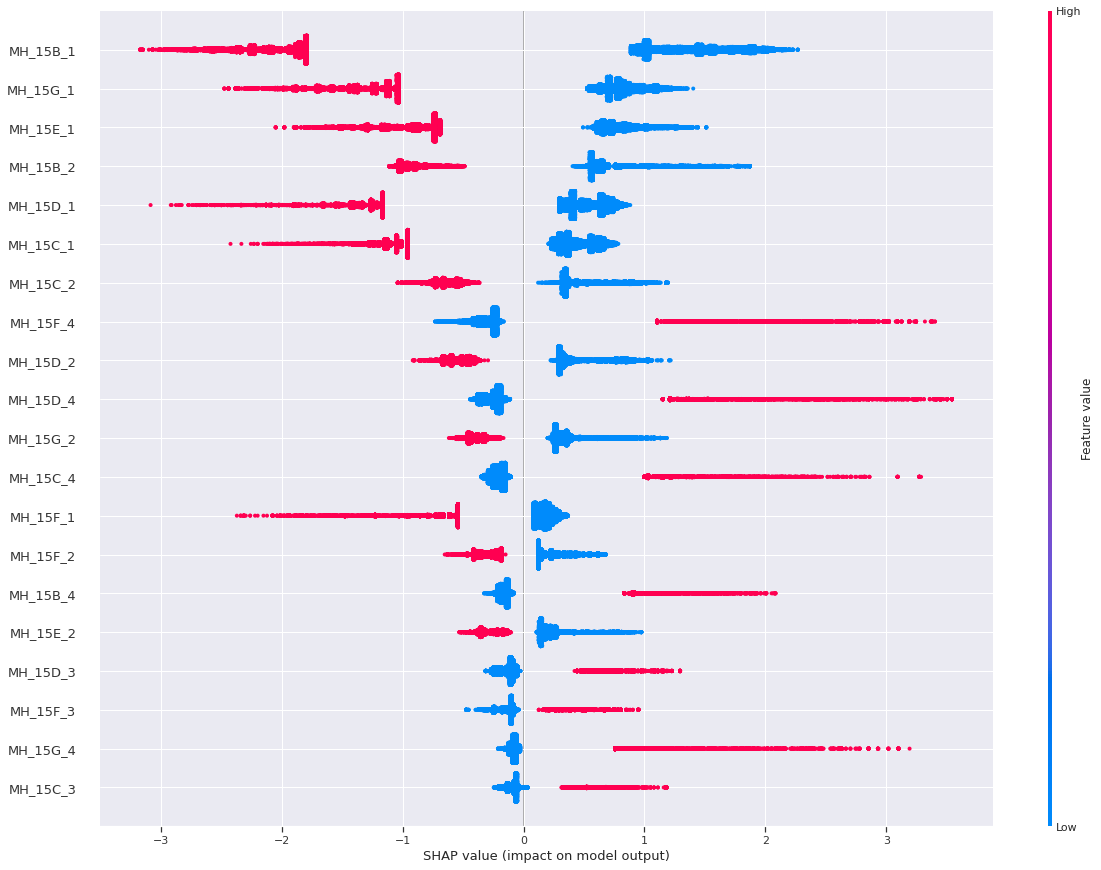

In [ ]:
shap.summary_plot(shap_values_train[1], X_train_boruta, plot_type="dot", plot_size=(20,15));

# 16) Próximos passos
* Avaliar a retirada de variáveis com base na dependência (Qui-quadrado)
* Avaliar a retirada de variáveis com base em possível data leakage
* Reconstruir o modelo com o novo conjunto de variáveis
* Tunar hiperparâmetros
* Shap Values

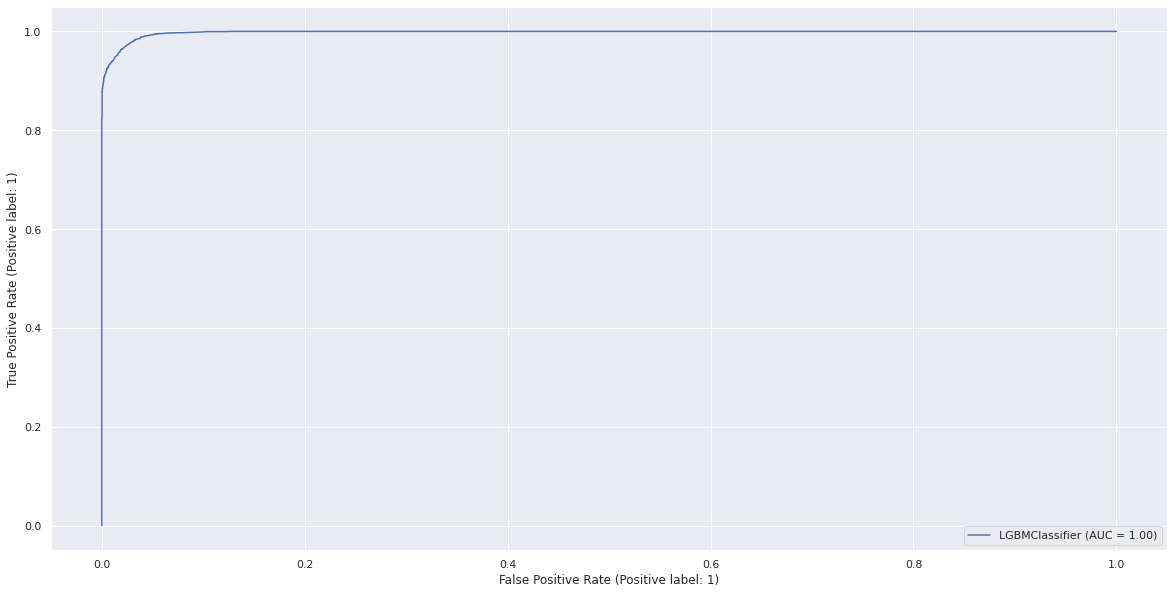

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(model_lgbm_boruta, X_test_boruta, y_test) 
plt.show()

In [ ]:
# Hiperparâmetros

!pip install --quiet optuna

     |████████████████████████████████| 308 kB 14.0 MB/s 
     |████████████████████████████████| 209 kB 75.2 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 149 kB 33.6 MB/s 
     |████████████████████████████████| 112 kB 73.2 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 


In [ ]:
import optuna

optuna.__version__

'2.10.0'

In [ ]:
import sklearn.svm

def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 2, 20)
        max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))